# Linear Regression
---
`from sklearn.linear import LinearRegression`

**Simple Linear Regression**: Una sola variable independiente para realizar una regresión.
$$y = b_0 + b_1x$$
**Multiple Linear Regression**: Múltiples variables independientes para realizar una predicción.
$$\hat{Y}=b_0+b_1x_1+b_2x_2+b_3x_3+b_4x_4$$


# **Visualización**
---
* **Regression Plot**
 
`sns.regplot(x, y)`

* **Residual plot**:

`sns.residplot(x, y)`

**Distribution plots**

`ax1 = sns.distplot(df[price], hist=False, color='r', label='Actual Value')`

`sns.distplot(Yhat, ist=False, color='b', label='Fitted Values', ax=ax1)`

# **Regresión Polinomial**
---
Se trata de un caso especial de una regresión lineal, en donde, dependiendo la curva, se debe calcular un polinomio a partir de elevar a una potencia a la variable independiente (x). 

* *Cuadrática (2do orden)*
$$\hat{Y} = b_0 + b_1x_1+b_2(x_1)^2$$
* *Cúbica (3er orden)*
$$\hat{Y}=b_0+b_1x_1+b_2(x_1)^2+b_3(x_1)^3$$

`from sklearn.preprocessing import PolynomialFeatures`

`pr = PolynomialFeatures(degree=2, include_bias=False)`

# **Pipelines**
---

Existen muchos pasos para obtener una predicción:

*Polynomial transform* -> *Normalization* -> *Linear Regression*



# **Métricas de evaluación**
---

* ***Mean Square Error (MSE)***

`from sklearn.metrics import mean_squared_error`

* ***R-squared/R^2***

Es una medida para determinar cuán cerca están los datos de la linea de regresión entrenada.
$R^2$: Porcentaje de variación de la variable objetivo (Y).

$$R^2 = 1 - \frac{MSE de la línea de regresión}{MSE de la media de los datos}$$

`lm.fit(x,y)`

`lm.score(x,y)`

* **Un modelo con un valor de $R^2$ cercano de 1 y un bajo MSE es generalmente un buen entrenamiento.**
* **Un modelo con un bajo $R^2$ un alto MSE probablemente no será útil.**
* **Tener cuidado con un modelo con $R^2$ negativo: podría indicar sobre-entrenamiento.**
* **¿Un menor MSE equivale a un mejor entrenamiento?** No necesariamente.
* **El MSE para un modelo de regreseión lineal múltiple siempre será menor que el MSE para uno de regresión lineal simple, dado que los errores decrecerán cuantas más variables sean incluídas en el modelo.**
* **Un modelo de regresión polinomial siempre tendrá un MSE más pequeño que una regresión regular.**
* **Existe una relación similar pero inversa para $R^2$**

# **Determinar el mejor modelo**
---
Para hacerlo se debe buscar una combinación de:
* Los valores predichos tengan sentido.
* Visualización.
* Evaluación con métricas.
* Comparar modelos.


**Cómo determinarlo**
* El modelo conun mayor $R^2$
* El modelo con el menor MSE



---
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv")
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


---
## 1. **Regresión Lineal Simple y Múltiple**
---
`from sklearn.linear import LinearRegression`

**Simple Linear Regression**: Una sola variable independiente para realizar una regresión.
$$y = b_0 + b_1x$$
**Multiple Linear Regression**: Múltiples variables independientes para realizar una predicción.
$$\hat{Y}=b_0+b_1x_1+b_2x_2+b_3x_3+b_4x_4$$

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lm = LinearRegression()
lm

LinearRegression()

In [6]:
X = df[["highway-mpg"]]
Y = df["price"]

In [12]:
lm.fit(X,Y)

LinearRegression()

In [13]:
Yhat = lm.predict(X)
Yhat[:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [14]:
lm.intercept_, lm.coef_

(38423.3058581574, array([-821.73337832]))

**intercept**: Punto donde la línea de regresión cruza el eje Y cuando todas las variables independientes (predictores) son iguales a 0. Es decir, cuando $x = 0$, entonces $\beta_0$ es 38423.3048.

**coef**: Representa la magnitud y la derección de la relación entre cada predictor y la variable dependiente. Captura la contribución individual de cada predictor a la variable dependiente. Un coeficiente positivo indica que un aumento en el predictor está asociado con un aumento en la variable dependiente, meintras que un coeficiente negativo indica una relación inversa.

**Modelo lineal final**
$$Precio = 38423.3059 - 821.7334 * highway-mpg$$

In [15]:
lm1 = LinearRegression()
X1 = df[["engine-size"]]

In [16]:
lm1.fit(X1, Y)
lm1

LinearRegression()

In [17]:
preds = lm1.predict(X1)
preds[:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [22]:
print(f"Yhat = {lm1.intercept_:.4f} + {lm1.coef_[0]:.4f} x X")

Yhat = -7963.3389 + 166.8600 x X


In [23]:
precio = lm1.intercept_ + lm1.coef_[0] * df['engine-size']
precio

0      13728.463134
1      13728.463134
2      17399.383479
3      10224.402804
4      14729.623228
           ...     
196    15563.923306
197    15563.923306
198    20903.443808
199    16231.363369
200    15563.923306
Name: engine-size, Length: 201, dtype: float64

### Regresión Lineal Múltiple

In [24]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [25]:
lm.fit(Z, df['price'])

LinearRegression()

In [26]:
lm.intercept_

-15806.62462632923

In [27]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [30]:
print(f"Precio = {lm.intercept_:.4f} + {lm.coef_[0]:.4f}x horsepower + {lm.coef_[1]:.4f}x curb-weight + {lm.coef_[2]:.4f}x engine-size  + {lm.coef_[3]:.4f}x highway-mpg")

Precio = -15806.6246 + 53.4957x horsepower + 4.7077x curb-weight + 81.5303x engine-size  + 36.0575x highway-mpg


In [31]:
lm2 = LinearRegression()
lm2.fit(df[["normalized-losses", "highway-mpg"]], Y)

LinearRegression()

In [32]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

---
## 2. **Evaluación del modelo**
---
### Regression plot

(0.0, 48166.742865128675)

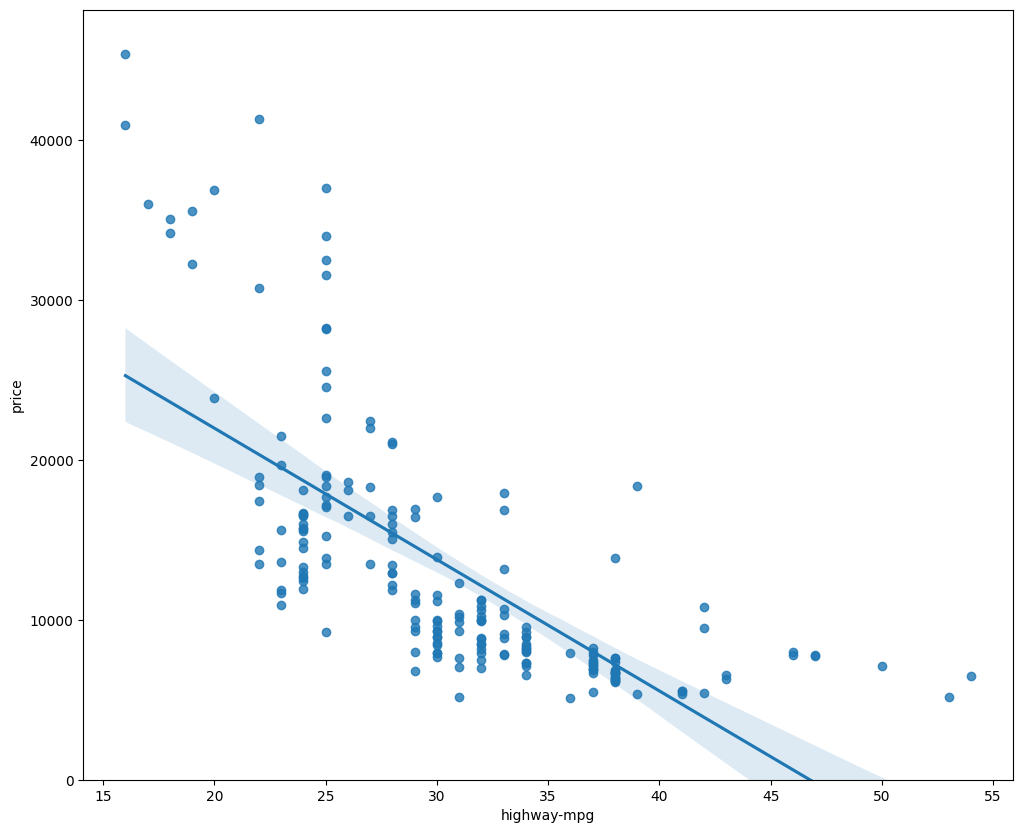

In [33]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

Se observa que el precio está negativamente correlacionado a highway-mpg dado que la curva es negativa. 

Un aspecto que hay que tener en cuenta cuando se observa una gráfica de regresión es cómo los puntos están distribuidos alrededor de la linea de regresión. Esto da un indicador de la varianza de los datos y si un modelo lineal será el mejor entrenado o no. Si los datos están muy lejos de la línea, el modelo puede no  ser el mejor.

(0.0, 47414.1)

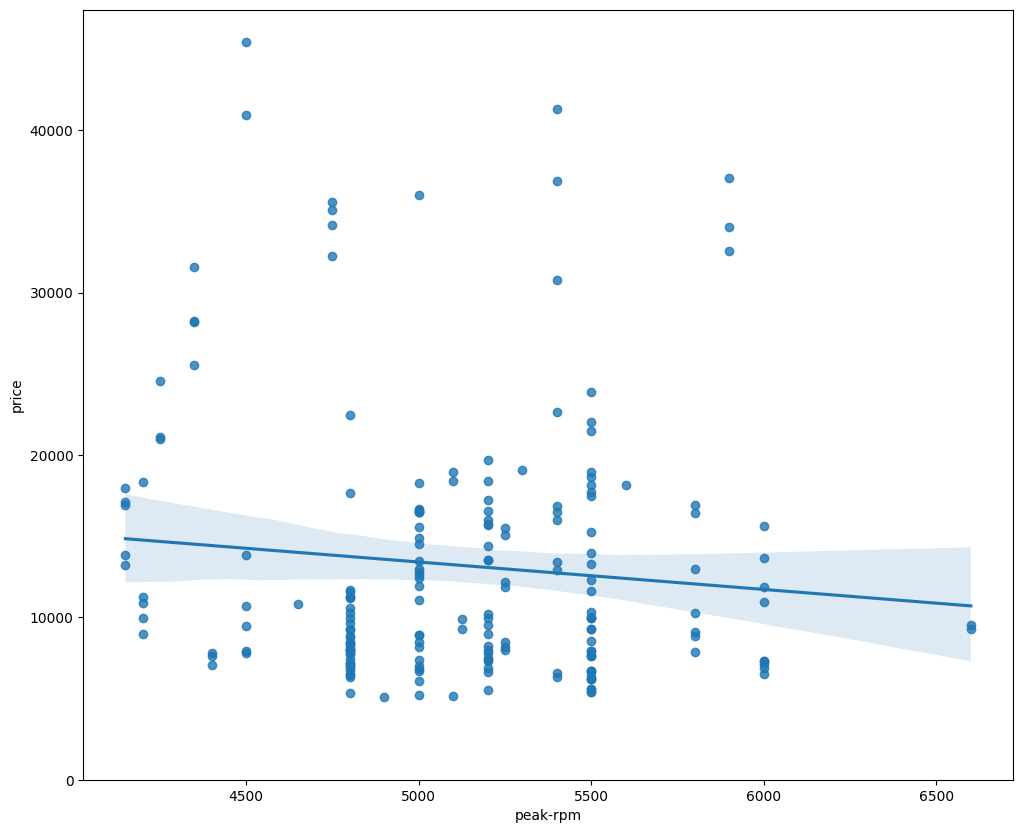

In [36]:
plt.figure(figsize=(width, height))
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0,)

Comparando nos damos cuenta de que los puntos para 'highway-mpg' están más cerca, y en promedio, decresen. Los puntos 'peak-rpm' tienen más separación sobre la línea.

In [37]:
df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


Lo anterior comprueba lo visto en las gráficas.

### Residual Plot

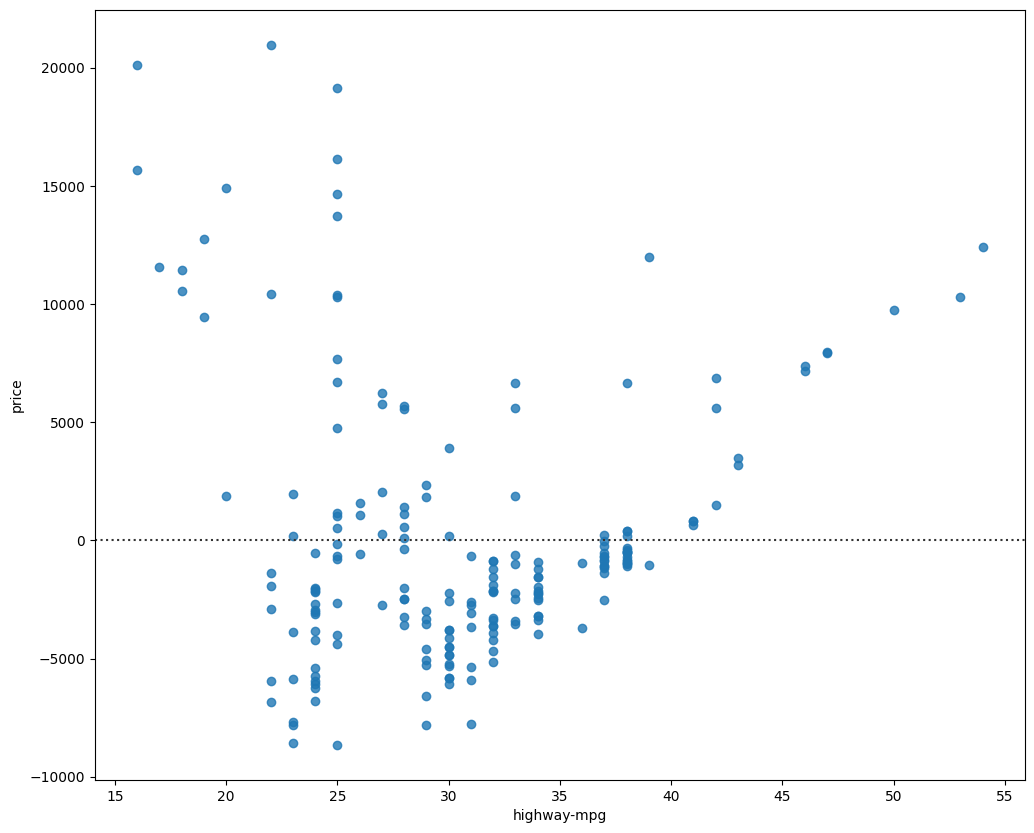

In [38]:
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=Y)
plt.show()

Se aprecia que **no están separados aleatoriamente del eje x**, lo que indica que **puede que que un modelo no lineal sea más apropiado para estos datos.**

### Distribution plot

In [40]:
Y_hat = lm.predict(Z)

C:\Users\AlxMa\AppData\Local\Temp\ipykernel_2112\548068211.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')
C:\Users\AlxMa\AppData\Local\Temp\ipykernel_2112\548068211.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

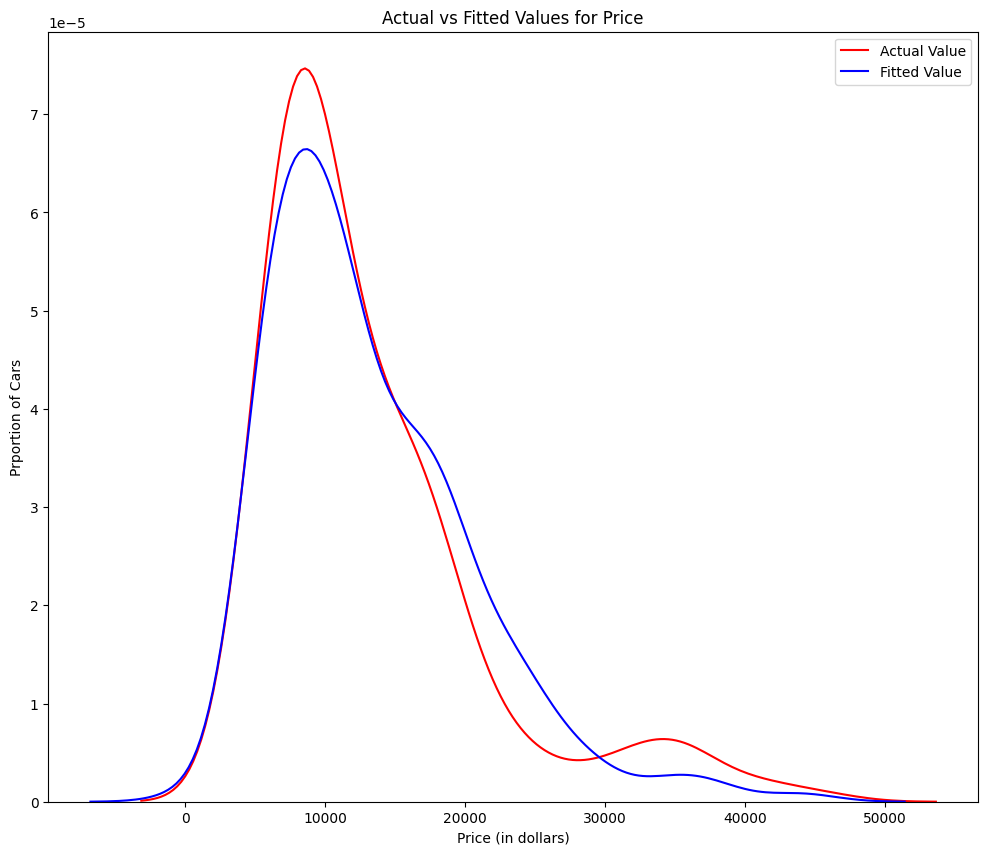

In [45]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')
sns.distplot(Y_hat, hist=False, color='b', label='Fitted Value', ax=ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price (in dollars)")
plt.ylabel("Prportion of Cars")

plt.legend()
plt.show()
plt.close()

Los valores obtenidos están razonablemente cerca de los valores verdaderos, dado que se superponen un poco. De todas formar, esto se puede mejorar aún más.

---
## 3. **Regresión polinomial y Pipelines**
---

In [47]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [48]:
x = df["highway-mpg"]
y = df["price"]

In [49]:
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


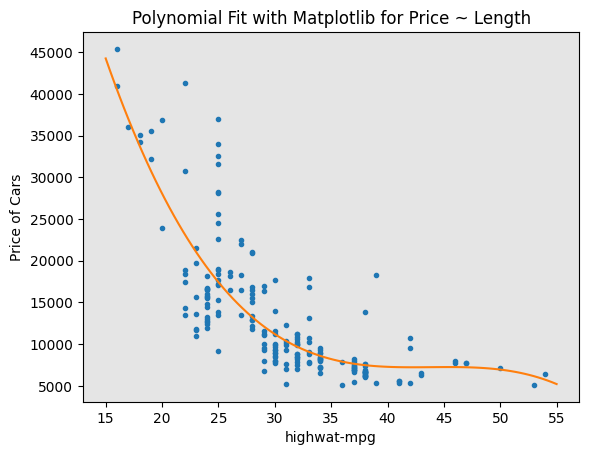

In [50]:
PlotPolly(p, x, y, "highwat-mpg")

Este modelo polinomial tiene un mejor rendimiento que los modelos lineales. 

In [51]:
f = np.polyfit(x,y,11)
p = np.poly1d(f)
print(p)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


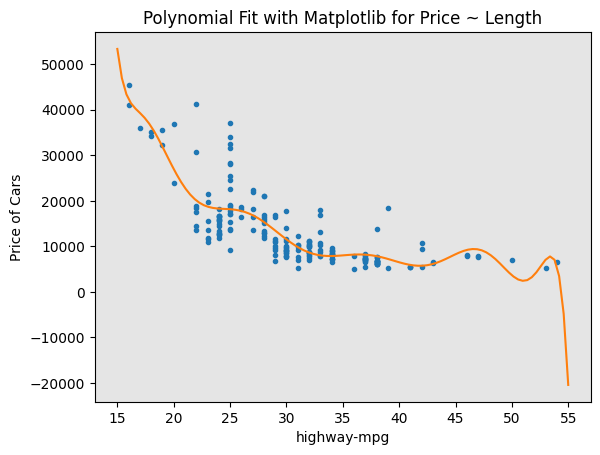

In [52]:
PlotPolly(p, x, y, "highway-mpg")

In [53]:
from sklearn.preprocessing import PolynomialFeatures

In [54]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [55]:
Z_pr = pr.fit_transform(Z)

In [57]:
Z.shape

(201, 4)

In [58]:
Z_pr.shape

(201, 15)

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [60]:
Input = [('scale', StandardScaler()),
        ('polynomial', PolynomialFeatures(include_bias=False)),
        ('model', LinearRegression())]

In [61]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [62]:
Z = Z.astype(float)
pipe.fit(Z, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [63]:
ypipe = pipe.predict(Z)
ypipe[:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [66]:
pipe2 = Pipeline([
    ('scale', StandardScaler()),
    ('model', LinearRegression())
]) 

pipe2.fit(Z, y)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [67]:
ypipe = pipe2.predict(Z)
ypipe[:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

---
## 4. **Métricas de evaluación**
---

### Regresión lineal simple

In [68]:
lm.fit(X, Y)
print("R-cuadrada: ", lm.score(X, Y))

R-cuadrada:  0.4965911884339176


In [69]:
yhat = lm.predict(X)
print("La salida de los primeros cuatro valores predichos es: ", yhat[0:4])

La salida de los primeros cuatro valores predichos es:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [70]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df['price'], yhat)
print("MSE: ", mse)

MSE:  31635042.944639888


### Regresión Lineal Múltiple

In [71]:
lm.fit(Z, df['price'])

print("R-cuadrada: ", lm.score(Z, df['price']))

R-cuadrada:  0.8093562806577457


In [72]:
Y_predict_multifit = lm.predict(Z)
print("MSE: ", mean_squared_error(df['price'], Y_predict_multifit))

MSE:  11980366.87072649


**MSE**: El modelo tienen un menor MSE.

**R-cuadrada**: EL modelo tienen una mayor R-cuadrada.

Se puede concluir que este modelo es mejor que la regresión lineal simple.

### Regresión Polinomial

In [73]:
from sklearn.metrics import r2_score

In [74]:
r_squared = r2_score(y, p(x))
print("R-cuadrada: ", r_squared)

R-cuadrada:  0.702376909204032


In [75]:
mean_squared_error(df['price'], p(x))

18703127.64164033

**MSE**: El modelo no tiene el menor valor de MSE.

**R-cuadrada**: El modelo no tienen el mayor valor de R-cuadrada.

### Se concluye que el mejor modelo es el de la **regresión lineal múltiple**.

---
## 5. **Predicción y Elección del modelo**
---

In [76]:
new_input = np.arange(1, 100, 1).reshape(-1,1)

In [77]:
lm.fit(X, Y)
lm

LinearRegression()

In [78]:
yhat = lm.predict(new_input)
yhat[:5]

C:\Users\AlxMa\anaconda3\envs\Colab\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

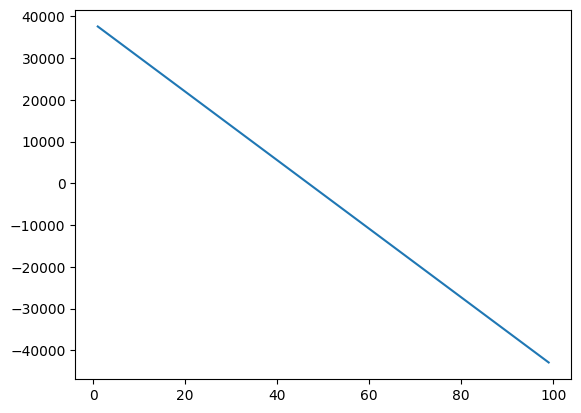

In [79]:
plt.plot(new_input, yhat)
plt.show()